In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# Load datasets


In [2]:
day_wise = pd.read_csv("/day_wise[1].csv")


In [3]:
day_wise

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [4]:
day_wise.columns


Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

# Data Preprocessing

## Data cleaning: handling missing values

In [5]:
day_wise.isnull().sum()

,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


# Check for duplicates


In [7]:
duplicates = day_wise.duplicated()

In [8]:
duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
183,False
184,False
185,False
186,False


# Convert Date column to datetime


In [ ]:
day_wise['Date'] = pd.to_datetime(day_wise['Date'])



# **Data** **transformation**

## Scaling/Normalization (MinMaxScaler)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
day_wise[['Confirmed', 'Deaths', 'Recovered']] = scaler.fit_transform(day_wise[['Confirmed', 'Deaths', 'Recovered']])


# Encoding categorical variable (Date)


In [9]:
day_wise['Date'] = pd.to_datetime(day_wise['Date'])
day_wise['Year'] = day_wise['Date'].dt.year
day_wise['Month'] = day_wise['Date'].dt.month
day_wise['Day'] = day_wise['Date'].dt.day


# Log transformation (for skewed data)


In [10]:
day_wise['Confirmed_Log'] = np.log(day_wise['Confirmed'])
day_wise['Deaths_Log'] = np.log(day_wise['Deaths'])
day_wise['Recovered_Log'] = np.log(day_wise['Recovered'])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#**Feature Engineering**


## Daily Growth Rates




In [11]:
day_wise['Confirmed_Growth_Rate'] = ((day_wise['Confirmed'] - day_wise['Confirmed'].shift(1)) / day_wise['Confirmed'].shift(1)) * 100
day_wise['Deaths_Growth_Rate'] = ((day_wise['Deaths'] - day_wise['Deaths'].shift(1)) / day_wise['Deaths'].shift(1)) * 100
day_wise['Recovered_Growth_Rate'] = ((day_wise['Recovered'] - day_wise['Recovered'].shift(1)) / day_wise['Recovered'].shift(1)) * 100


# Mortality Ratios


In [12]:
day_wise['Deaths'] / (day_wise['Confirmed'] + day_wise['Recovered'])
day_wise['Case_Fatality_Ratio'] = day_wise['Deaths'] / (day_wise['Confirmed'] - day_wise['Recovered'])
day_wise['Recovery_Ratio'] = day_wise['Recovered'] / day_wise['Confirmed']

In [13]:
day_wise

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,...,Month,Day,Confirmed_Log,Deaths_Log,Recovered_Log,Confirmed_Growth_Rate,Deaths_Growth_Rate,Recovered_Growth_Rate,Case_Fatality_Ratio,Recovery_Ratio
0,2020-01-22,0.000000,0.000000,0.000000e+00,510,0,0,0,3.06,5.05,...,1,22,-inf,-inf,-inf,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0.000006,0.000002,2.112365e-07,606,99,1,2,2.75,4.59,...,1,23,-12.022534,-1.339089e+01,-15.370287,inf,inf,inf,0.263801,0.035163
2,2020-01-24,0.000023,0.000014,8.449461e-07,879,287,8,6,2.76,3.83,...,1,24,-10.661816,-1.119367e+01,-13.983993,289.898990,800.000000,300.000000,0.609504,0.036074
3,2020-01-25,0.000053,0.000038,1.161801e-06,1353,493,16,3,2.93,2.72,...,1,25,-9.838869,-1.017202e+01,-13.665539,127.720207,177.777778,37.500000,0.732623,0.021782
4,2020-01-26,0.000095,0.000060,2.534838e-06,2010,684,14,13,2.64,2.46,...,1,26,-9.263292,-9.727330e+00,-12.885381,77.815700,56.000000,118.181818,0.646005,0.026727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,0.941140,0.968609,9.200345e-01,6166006,282756,9966,169714,4.08,56.16,...,7,23,-0.060663,-3.189377e-02,-0.083344,1.856918,1.598337,1.986998,45.893099,0.977574
184,2020-07-24,0.958201,0.978004,9.441932e-01,6212290,281164,6144,228736,4.05,56.61,...,7,24,-0.042697,-2.224183e-02,-0.057424,1.812800,0.969867,2.625847,69.817158,0.985381
185,2020-07-25,0.973708,0.985445,9.673276e-01,6243930,255545,4867,219038,4.02,57.07,...,7,25,-0.026644,-1.466158e-02,-0.033218,1.618286,0.760905,2.450178,154.456254,0.993448
186,2020-07-26,0.986123,0.991720,9.815566e-01,6309711,204606,4104,134721,3.99,57.18,...,7,26,-0.013974,-8.314042e-03,-0.018616,1.275071,0.636773,1.470960,217.170115,0.995369


# Data Visualization (basic)

## Histograms


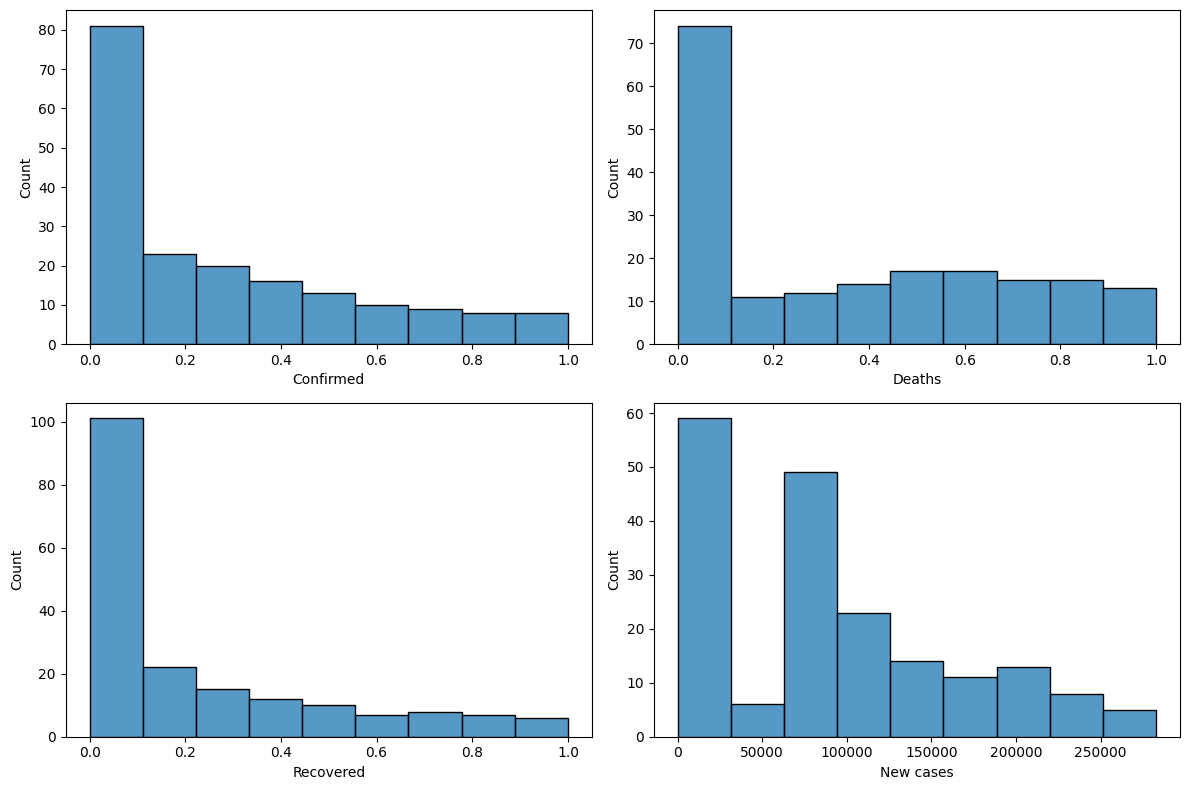

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(day_wise['Confirmed'], ax=axes[0, 0])
sns.histplot(day_wise['Deaths'], ax=axes[0, 1])
sns.histplot(day_wise['Recovered'], ax=axes[1, 0])
sns.histplot(day_wise['New cases'], ax=axes[1, 1])
plt.tight_layout()
plt.show()



## Time Series Plots


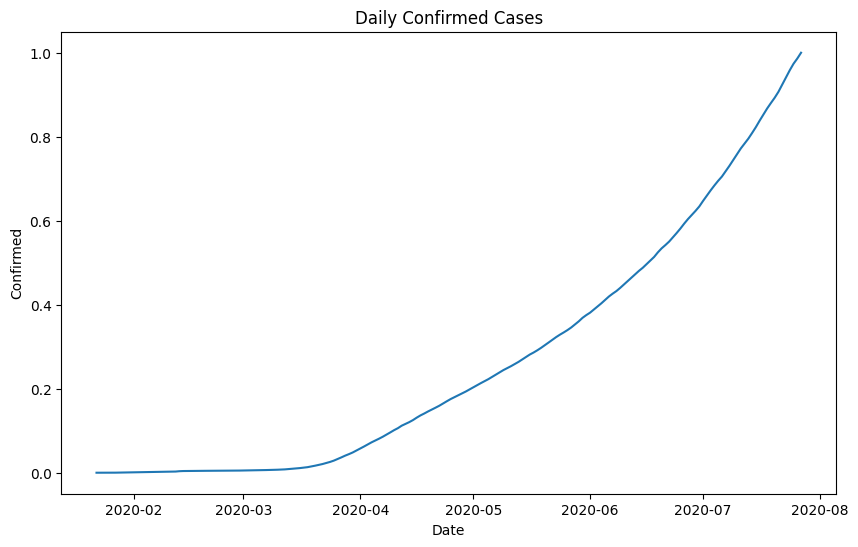

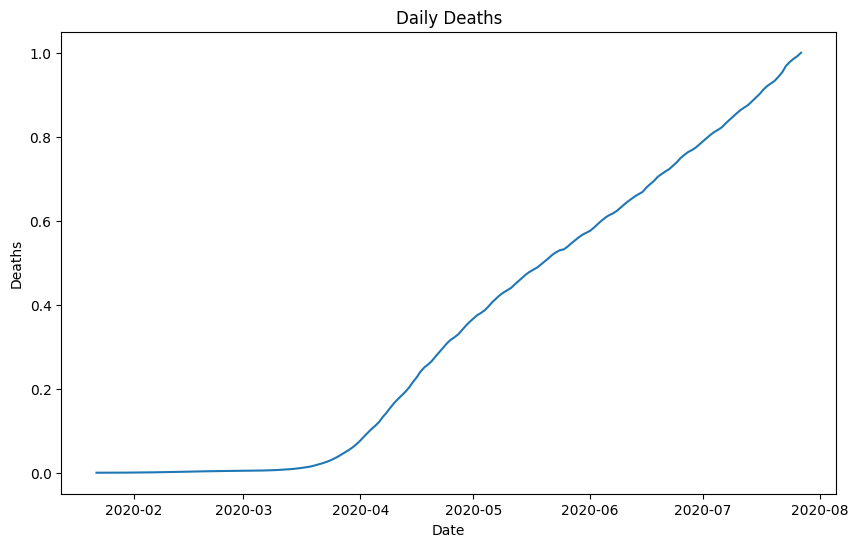

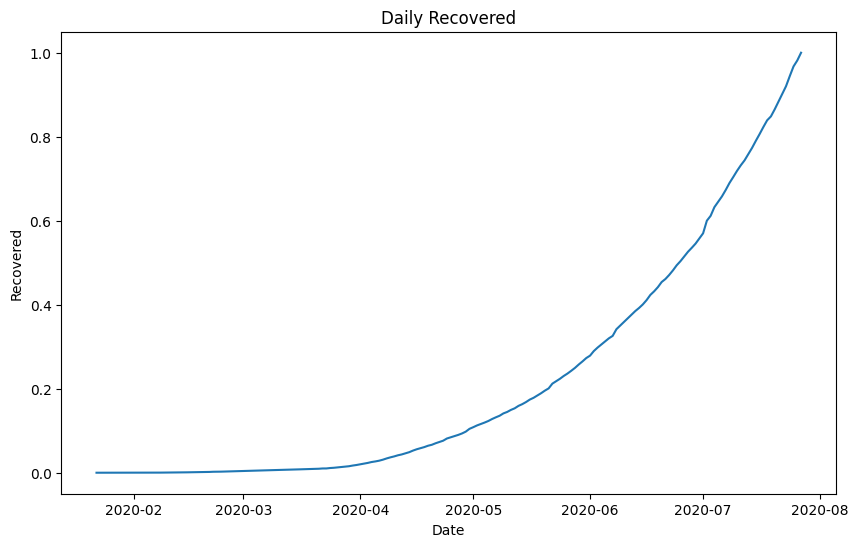

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=day_wise)
plt.title('Daily Confirmed Cases')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Deaths', data=day_wise)
plt.title('Daily Deaths')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Recovered', data=day_wise)
plt.title('Daily Recovered')
plt.show()


# **Exploratory Data Analysis (EDA)**


## Univariate analysis

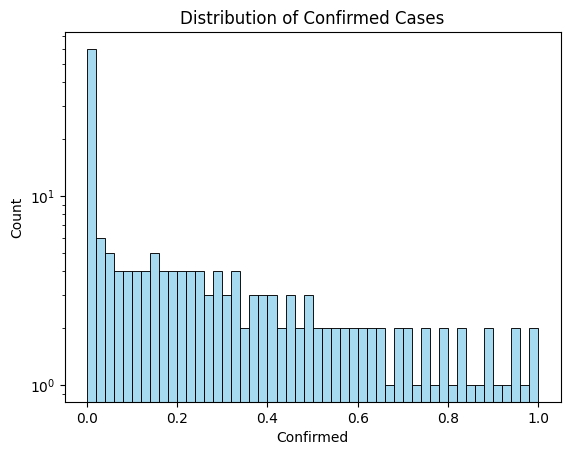

In [16]:
sns.histplot(day_wise['Confirmed'], bins=50, color='skyblue')
plt.title('Distribution of Confirmed Cases')
plt.yscale('log')
plt.show()


## Bivariate analysis


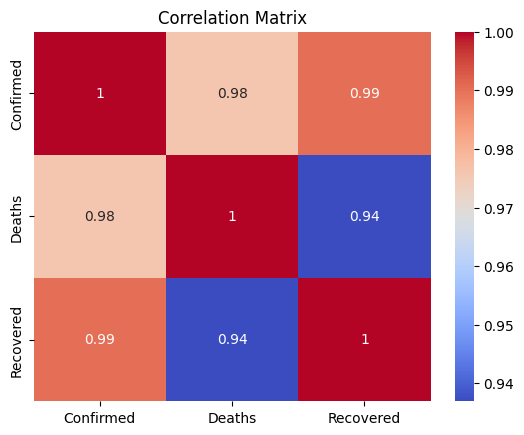

In [17]:
corr_matrix = day_wise[['Confirmed', 'Deaths', 'Recovered']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Multivariate analysis


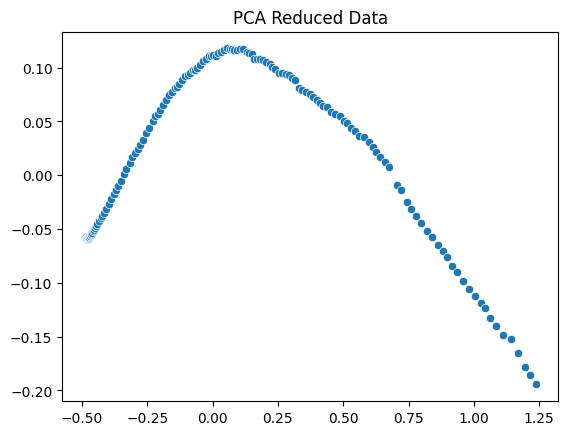

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(day_wise[['Confirmed', 'Deaths', 'Recovered']])
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1])
plt.title('PCA Reduced Data')
plt.show()

## Time series plot


In [19]:
px.line(day_wise, x='Date', y='Confirmed', title='Confirmed Cases Over Time')


# Split data into training and testing sets


In [22]:
df = pd.read_csv('/day_wise[1].csv')


In [23]:
df['Date'] = pd.to_datetime(df['Date']).apply(lambda x: x.timestamp())



In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Confirmed', axis=1), df['Confirmed'], test_size=0.2, random_state=42)


# Regression Models

## Random Forest Regression

### Fitting the model


In [25]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Model prediction

In [26]:
y_pred = rf_model.predict(X_test)


## Prediction result

In [27]:
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


RMSE: 41710.52494178966
MAE: 24779.094210526353
MSE: 1739767890.9196577
R²: 0.9999282207633445


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



# Visualizations

# Scatter Plot


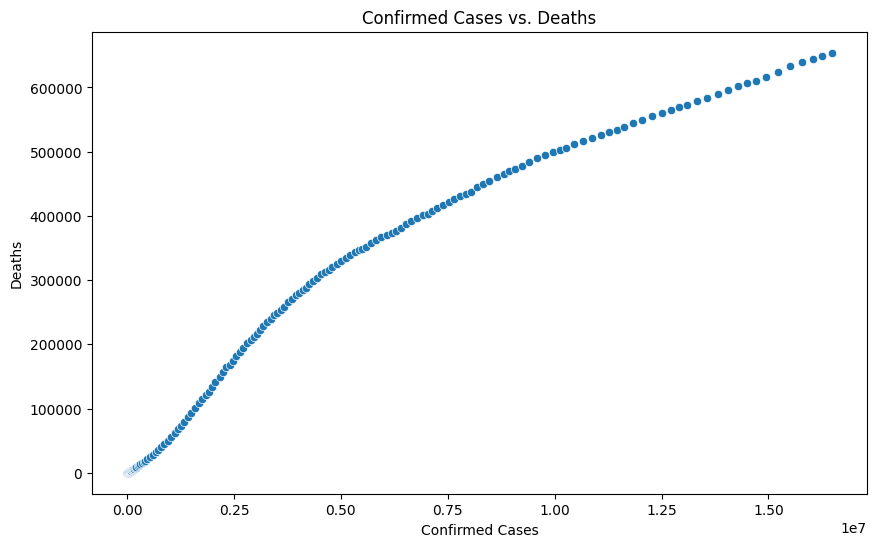

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df)
plt.title('Confirmed Cases vs. Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()

